In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')
test_values = pd.read_csv('test_values.csv',index_col='building_id')

In [74]:
set_train = train_values.merge(train_labels)
set_train.drop( columns=["building_id"], inplace=True)
set_train = set_train[set_train['count_floors_pre_eq'] <= 6]
set_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3


In [75]:
#drop_columns = set_train.columns.values[26:38]
#set_train.drop(columns= drop_columns, inplace = True)

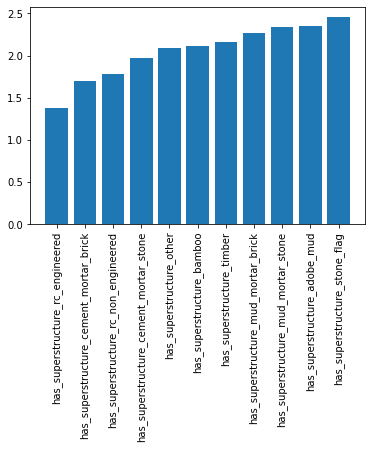

In [76]:
materiales = set_train.iloc[:,14:25]
materiales['damage_grade'] = set_train['damage_grade']
vector_names = ['has_superstructure_rc_engineered','has_superstructure_cement_mortar_brick', 'has_superstructure_rc_non_engineered',
               'has_superstructure_cement_mortar_stone','has_superstructure_other', 'has_superstructure_bamboo',
                'has_superstructure_timber', 
                'has_superstructure_mud_mortar_brick', 'has_superstructure_mud_mortar_stone',
                'has_superstructure_adobe_mud','has_superstructure_stone_flag']
promedios = []
for x in range(len(vector_names)):
    aux = materiales.loc[materiales[vector_names[x]] == 1,:]
    promedios.append(aux['damage_grade'].sum() / aux[vector_names[x]].sum())

plt.bar(vector_names,promedios )
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

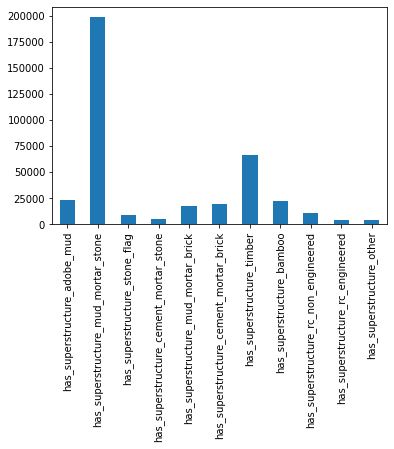

In [77]:
set_train.iloc[:, 14:25].sum().plot.bar()

In [78]:
values = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05]
for i in range(11):
    set_train.loc[:, [vector_names[i]]] = set_train.loc[:, [vector_names[i]]]*values[i]

In [79]:
set_train['resistencia'] = 0
for x in range(11):
    set_train['resistencia'] += set_train[vector_names[x]]

set_train['resistencia'].head()

0    0.3
1    0.2
2    0.2
3    1.1
4    0.1
Name: resistencia, dtype: float64

In [80]:
land_surface_condition = pd.DataFrame()
foundation_type = pd.DataFrame()

In [81]:
land_surface_condition[['n', 'o', 't']]= pd.get_dummies(set_train['land_surface_condition'])
foundation_type[['h', 'i', 'r', 'u', 'w']]= pd.get_dummies(set_train['foundation_type'])

In [82]:
land_surface_condition['n']  = land_surface_condition['n'] * land_surface_condition['n'].mean()
land_surface_condition['o']  = land_surface_condition['o'] * land_surface_condition['o'].mean()
land_surface_condition['t']  = land_surface_condition['t'] * land_surface_condition['t'].mean()

In [83]:
foundation_type['h'] = foundation_type['h'] * foundation_type['h'].mean()
foundation_type['i'] = foundation_type['i'] * foundation_type['i'].mean()
foundation_type['r'] = foundation_type['r'] * foundation_type['r'].mean()
foundation_type['u'] = foundation_type['u'] * foundation_type['u'].mean()
foundation_type['w'] = foundation_type['w'] * foundation_type['w'].mean()

In [84]:
set_train['land_surface_condition'] = land_surface_condition['n'] + land_surface_condition['o'] + land_surface_condition['t']
set_train['foundation_type'] = foundation_type['h'] + foundation_type['i'] + foundation_type['r'] + foundation_type['u'] + foundation_type['w']

set_train['base_condition'] = set_train['land_surface_condition'] + set_train['foundation_type']

In [85]:
roof_type = pd.DataFrame()
ground_floor_type = pd.DataFrame()
other_floor_type = pd.DataFrame()

In [86]:
roof_type[['n','q','x']] = pd.get_dummies(set_train['roof_type']) 
ground_floor_type[['f','m','v','x','z']] = pd.get_dummies(set_train['ground_floor_type'])
other_floor_type[['j','q','s','x']] = pd.get_dummies(set_train['other_floor_type'])

In [87]:
roof_type['n'] = roof_type['n'] * roof_type['n'].mean()
roof_type['q'] = roof_type['q'] * roof_type['q'].mean()
roof_type['x'] = roof_type['x'] * roof_type['x'].mean()

In [88]:
ground_floor_type['f'] = ground_floor_type['f'] * ground_floor_type['f'].mean()
ground_floor_type['m'] = ground_floor_type['m'] * ground_floor_type['m'].mean()
ground_floor_type['v'] = ground_floor_type['v'] * ground_floor_type['v'].mean()
ground_floor_type['x'] = ground_floor_type['x'] * ground_floor_type['x'].mean()
ground_floor_type['z'] = ground_floor_type['z'] * ground_floor_type['z'].mean()

In [89]:
other_floor_type['j'] = other_floor_type['j'] * other_floor_type['j'].mean()
other_floor_type['q'] = other_floor_type['q'] * other_floor_type['q'].mean()
other_floor_type['s'] = other_floor_type['s'] * other_floor_type['s'].mean()
other_floor_type['x'] = other_floor_type['x'] * other_floor_type['x'].mean()

In [90]:
roof_type['sum'] = roof_type['n'] + roof_type['q'] + roof_type['x']
ground_floor_type['sum'] = ground_floor_type['f'] + ground_floor_type['m'] + ground_floor_type['v']\
                           + ground_floor_type['x'] + ground_floor_type['z']
other_floor_type['sum'] = other_floor_type['j'] + other_floor_type['q'] + other_floor_type['s']\
                             + other_floor_type['x']
set_train['construction_type'] = roof_type['sum'] + ground_floor_type['sum'] + other_floor_type['sum']

In [91]:
columnas_seleccionadas = ['age',
                         'geo_level_1_id',
                         'area_percentage',
                         'count_floors_pre_eq',
                         'geo_level_2_id',
                         'height_percentage',
                         'base_condition',
                         'construction_type',
                         'resistencia',
                         'damage_grade']
set_train[columnas_seleccionadas].to_csv('data_set.csv')